In [77]:
import networkx as nx
import matplotlib.pyplot as plt
from trust.pagerank import PersonalizedPageRank, PersonalizedPageRankNx

In [78]:
# Create the test graph
G = nx.DiGraph()
G.add_nodes_from((1,2,3))
G.add_edge(1,2, weight=10)
G.add_edge(1,3, weight=10)
G.add_edge(2,3, weight=20)

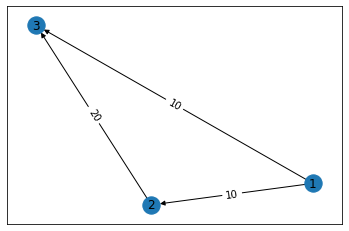

In [79]:
def vis_graph(g):
# Visualize the graph, for clarity
    pos=nx.spring_layout(g)
    nx.draw_networkx(g,pos)
    labels = nx.get_edge_attributes(g,'weight')
    nx.draw_networkx_edge_labels(g,pos,edge_labels=labels)
    
vis_graph(G)

In [80]:
# We're calculating the ratings from the point of view of this (seed) node
def calc_rep(graph, seed_node):
    ppr = PersonalizedPageRank(graph, seed_node, reset_probability=0.0)

    reputation={}
    for n in graph.nodes():
        if n!=seed_node:
            reputation[n] = ppr.compute(seed_node, n)
    return reputation

print(calc_rep(G, 1))

{2: 0.3364299933642999, 3: 0.6635700066357001}


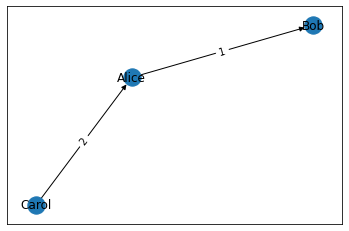

In [82]:
# Now, let's imagine the case for users/posts ratings
G = nx.DiGraph()

# For simplicity, we will use strings for user names and posts here, 
# but in the real system those will be identified by a number (unique DB key)
# Every upvote creates/increases an edge from the upvoter to the author of the original post

def vote(voter, author, amount=1):
    weight = G.get_edge_data(voter, author, default={'weight':0})['weight'] + amount
    G.add_edge(voter, author, weight=weight)

G.add_nodes_from(("Alice", "Bob", "Carol"))


# Alice creates a post on the board. Carol upvotes Alice's post
vote("Carol", "Alice")

# Carol upvotes it again 
vote("Carol", "Alice")

# Now Bob creates a post and Alice likes it
vote("Alice", "Bob")

vis_graph(G)

In [85]:
# Calculate the ratings from Carol's standpoint
print(calc_rep(G, "Carol"))

{'Alice': 0.5, 'Bob': 0.5}


In [86]:
# Note that if we try to calculate the reputation from the Alice's standpoint,
# Carol's reputation will be zero, despite Carol upvoted Alice before. 
# This is the most important feature of subjective ranking system that prevents Sybils attacks.
# The reasoning is simple: "if you say you're grateful to me, it does not mean I can trust you"
print(calc_rep(G, "Alice"))

{'Bob': 1.0, 'Carol': 0.0}
